In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# DATASET:

# Rgression Model For Average Price:

In [2]:
df = pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


above dataset shows us the information about avacoda fruit in which we can see 14 columns and 18249 rows. 
So we have various 14 features from its we have to prdict the region and average price i.e. per piece price. so region and average price are our target variables while building regression and classificaton model.there is one unnamed column which is not useful so we will drop it.

In [3]:
df.shape

(18249, 14)

its the shape of our data 14 features with 18249 rows.

Following is the individual description or meaning for each column

In [4]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


its the overall statastial health of our data where can see mean standard deviation max and min data.

In [5]:
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


I have dropped here column unnamed which is not useful.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


here we can see in our data three columns contian object data we have to convert it into int using encoder.

In [7]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

our dataset does not contain any null values.lets proceed ahead

In [8]:
df.type.value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

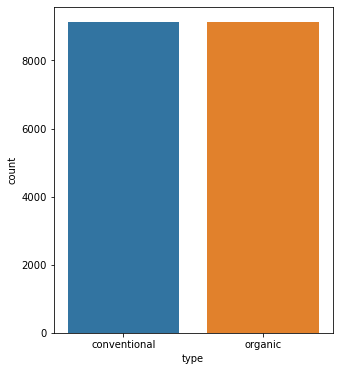

In [9]:
plt.figure(figsize=(5,6))
sns.countplot(df['type'])
plt.show()

In [10]:
df.year.value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

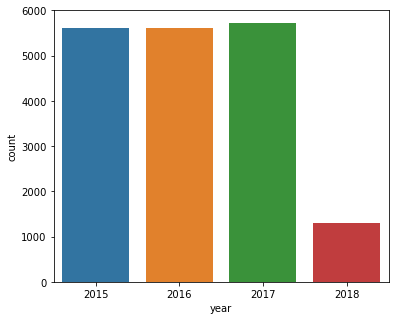

In [11]:
plt.figure(figsize=(6,5))
sns.countplot(df['year'])
plt.show()

In [12]:
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ':' + str(df[column].unique()))
        print(df[column].value_counts())
        print('*********************************************************')
        

Date:['2015-12-27' '2015-12-20' '2015-12-13' '2015-12-06' '2015-11-29'
 '2015-11-22' '2015-11-15' '2015-11-08' '2015-11-01' '2015-10-25'
 '2015-10-18' '2015-10-11' '2015-10-04' '2015-09-27' '2015-09-20'
 '2015-09-13' '2015-09-06' '2015-08-30' '2015-08-23' '2015-08-16'
 '2015-08-09' '2015-08-02' '2015-07-26' '2015-07-19' '2015-07-12'
 '2015-07-05' '2015-06-28' '2015-06-21' '2015-06-14' '2015-06-07'
 '2015-05-31' '2015-05-24' '2015-05-17' '2015-05-10' '2015-05-03'
 '2015-04-26' '2015-04-19' '2015-04-12' '2015-04-05' '2015-03-29'
 '2015-03-22' '2015-03-15' '2015-03-08' '2015-03-01' '2015-02-22'
 '2015-02-15' '2015-02-08' '2015-02-01' '2015-01-25' '2015-01-18'
 '2015-01-11' '2015-01-04' '2016-12-25' '2016-12-18' '2016-12-11'
 '2016-12-04' '2016-11-27' '2016-11-20' '2016-11-13' '2016-11-06'
 '2016-10-30' '2016-10-23' '2016-10-16' '2016-10-09' '2016-10-02'
 '2016-09-25' '2016-09-18' '2016-09-11' '2016-09-04' '2016-08-28'
 '2016-08-21' '2016-08-14' '2016-08-07' '2016-07-31' '2016-07-24'
 '201

In [13]:
df.rename(columns={'4046':'Small HASS sold',
                          '4225':'Large HASS sold',
                          '4770':'XLarge HASS sold'},inplace=True)
df

,Date,AveragePrice,Total Volume,Small HASS sold,Large HASS sold,XLarge HASS sold,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


<AxesSubplot:xlabel='Distribution of average price', ylabel='Density'>

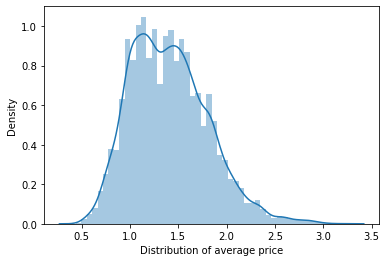

In [14]:
sns.distplot(df["AveragePrice"],axlabel="Distribution of average price")

This the distribution for average price. most of the avearge price lies between 1.0 and 1.8

In [15]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)
df['Year'] =df['Date'].apply(lambda x:x.year)
df.drop(['Date'],axis=1,inplace=True)

In [16]:
df

,AveragePrice,Total Volume,Small HASS sold,Large HASS sold,XLarge HASS sold,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day,Year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4,2018
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28,2018
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21,2018
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14,2018


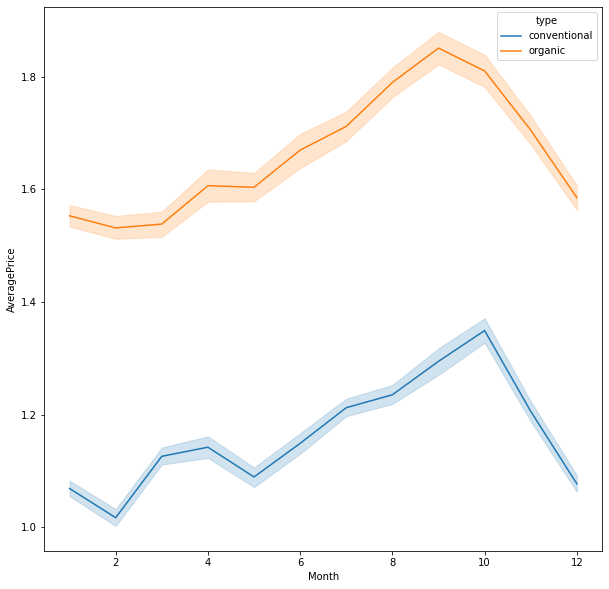

In [17]:
plt.figure(figsize=(10,10))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=df)
plt.show()

distrbibution of the average price over the month. and in 10 th month average price for both type of avacoda is high.

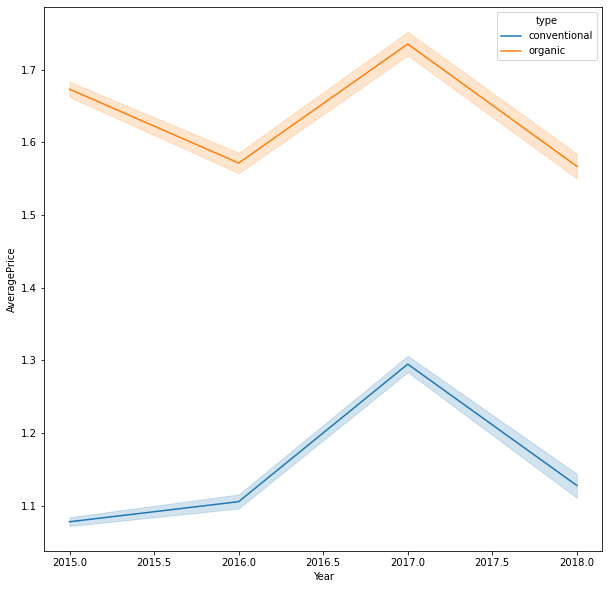

In [18]:
plt.figure(figsize=(10,10))
sns.lineplot(x="Year", y="AveragePrice", hue='type', data=df)
plt.show()

for 2015 price is lower than others and for 2017 its higher than all the years.

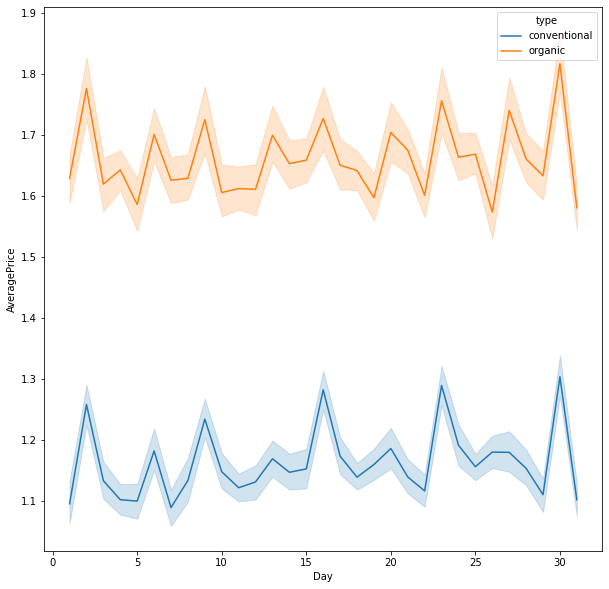

In [19]:
plt.figure(figsize=(10,10))
sns.lineplot(x="Day", y="AveragePrice", hue='type', data=df)
plt.show()

In the start middle and end of the price looking higher for the month.

In [20]:
df = pd.get_dummies(df, columns=['type'],drop_first=True)
df.head()

,AveragePrice,Total Volume,Small HASS sold,Large HASS sold,XLarge HASS sold,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,Day,Year,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany,12,27,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany,12,20,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany,12,13,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany,12,6,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany,11,29,2015,0


In [21]:
df['type_organic'].value_counts()

0    9126
1    9123
Name: type_organic, dtype: int64

9126 is count for conventional and 9123 is count for organic

<AxesSubplot:xlabel='type_organic', ylabel='AveragePrice'>

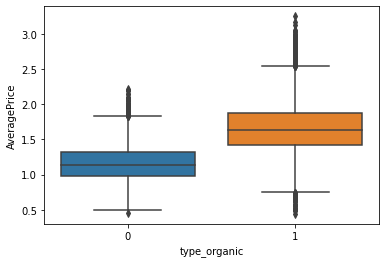

In [22]:
sns.boxplot(x="type_organic", y="AveragePrice", data=df)

Organic avacados are more expensive than conventional.

In [23]:
df['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

<AxesSubplot:xlabel='region'>

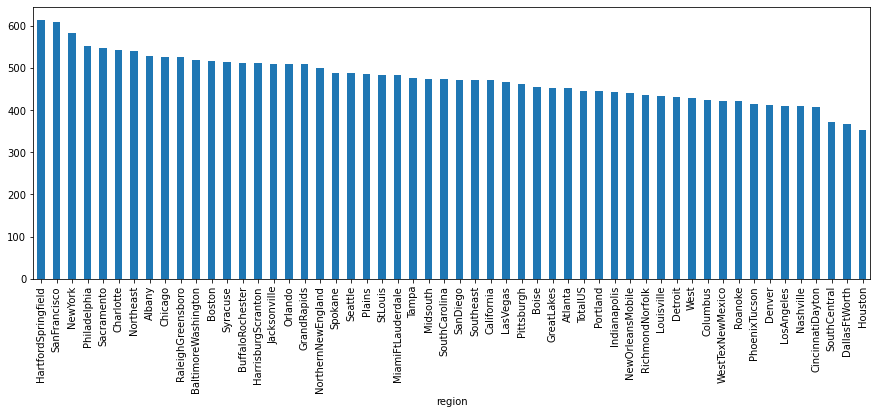

In [24]:
df.groupby("region")["AveragePrice"].sum().sort_values(ascending=False).plot(kind="bar",figsize=(15,5))

avocado's price varies with region having hartford Springfield highest and houstan cheapest.

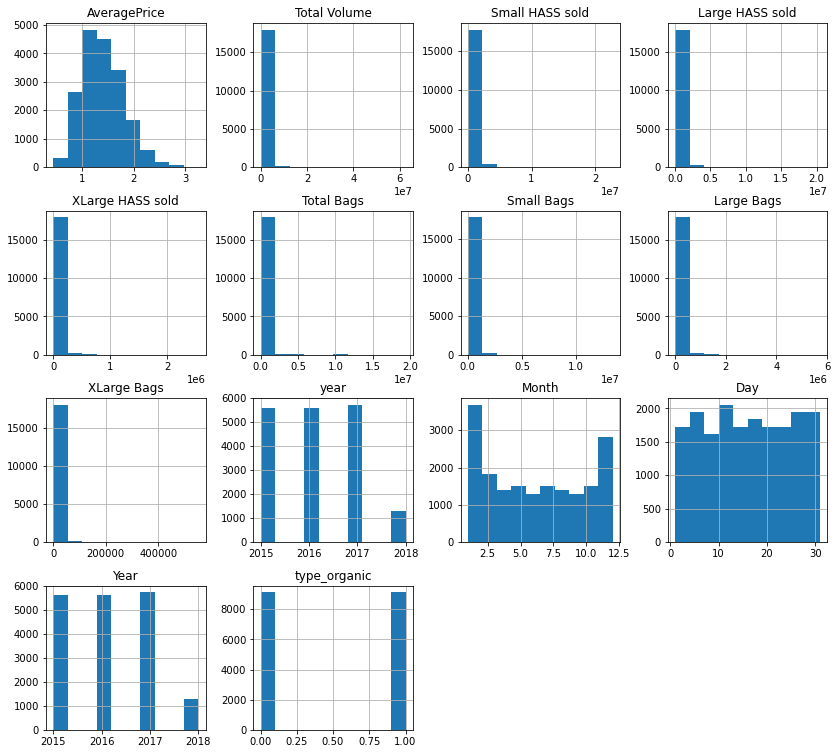

In [25]:
df.hist(figsize=(14,13));

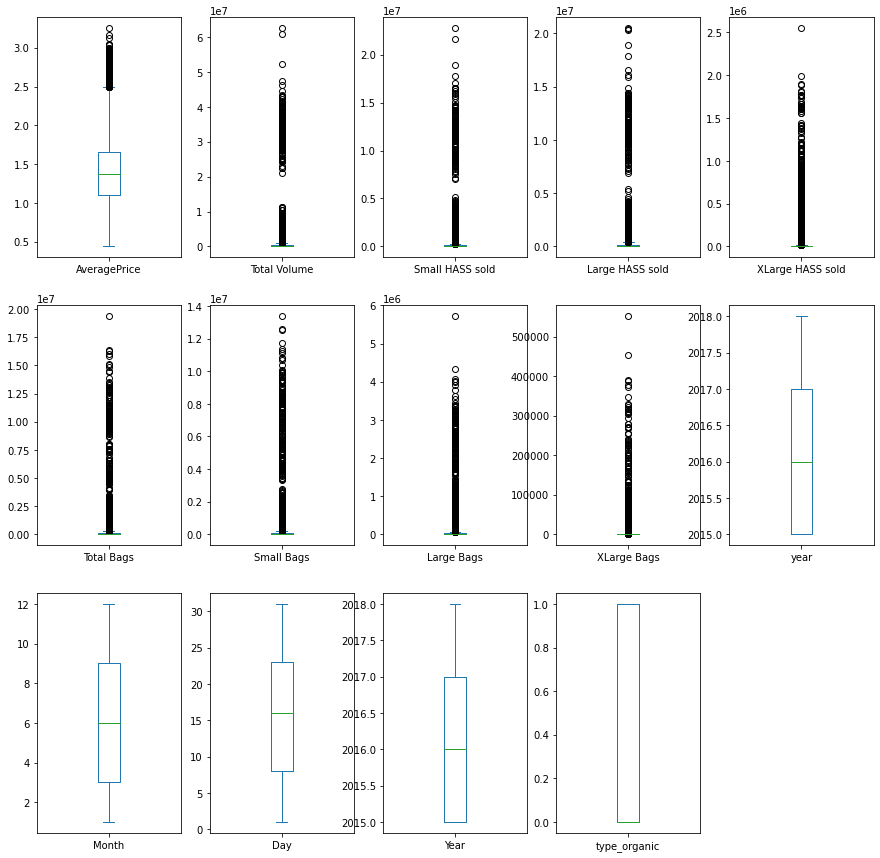

In [26]:
df.plot(kind='box',figsize=(15,15),layout=(3,5),sharex=False,subplots=True);

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
encoder = LabelEncoder()
df['region'] = encoder.fit_transform(df['region'])

In [29]:
df

,AveragePrice,Total Volume,Small HASS sold,Large HASS sold,XLarge HASS sold,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,Day,Year,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0,12,27,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0,12,20,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0,12,13,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0,12,6,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0,11,29,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,53,2,4,2018,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,53,1,28,2018,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,53,1,21,2018,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,53,1,14,2018,1


In [30]:
df.corr()

,AveragePrice,Total Volume,Small HASS sold,Large HASS sold,XLarge HASS sold,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,Day,Year,type_organic
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,-0.011716,0.162409,0.027386,0.093197,0.615845
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,0.174176,-0.024689,-0.009747,0.017193,-0.232434
Small HASS sold,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,0.192073,-0.025803,-0.010159,0.003353,-0.225819
Large HASS sold,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,0.145726,-0.022108,-0.012393,-0.009559,-0.232289
XLarge HASS sold,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,0.095252,-0.033424,-0.009009,-0.036531,-0.210027
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,0.175256,-0.022724,-0.004988,0.071552,-0.217788
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,0.164702,-0.023126,-0.003870,0.063915,-0.220535
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,0.198768,-0.020187,-0.008352,0.087891,-0.193177
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,0.082281,-0.012969,0.000319,0.081033,-0.175483
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,-0.000055,-0.177050,0.004475,1.000000,-0.000032


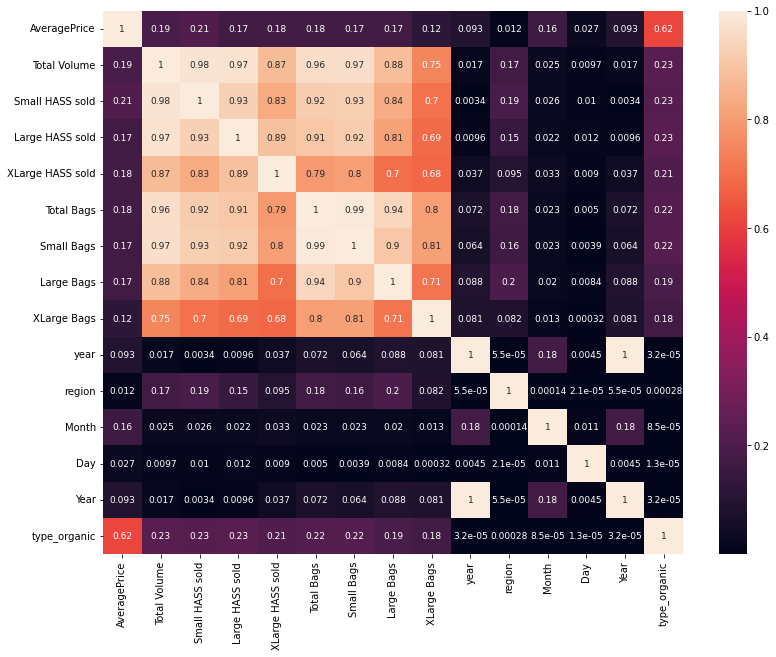

In [31]:
df_corr = df.corr().abs()

plt.figure(figsize =(13,10))
sns.heatmap(df_corr,annot = True, annot_kws={'size':9})
plt.show()

In [32]:
df.shape

(18249, 15)

In [33]:
x = df.drop(columns=['AveragePrice'],axis=1)
y= df['AveragePrice']

In [34]:
from sklearn.feature_selection import f_classif,SelectKBest

In [35]:
best_features = SelectKBest(score_func=f_classif,k=10)
fit = best_features.fit(x,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x.columns)

feature_scores = pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns = (['Feature_Name','Score'])

print(feature_scores.nlargest(10,'Score'))

        Feature_Name      Score
13      type_organic  53.269112
1    Small HASS sold   5.015080
0       Total Volume   4.122370
3   XLarge HASS sold   4.078789
2    Large HASS sold   3.508901
4         Total Bags   3.373669
5         Small Bags   3.331022
6         Large Bags   3.269397
8               year   3.056698
12              Year   3.056698


In [36]:
df.columns[[13,1,0,3,2,4,5,6,8,12]]

Index(['Year', 'Total Volume', 'AveragePrice', 'Large HASS sold',
       'Small HASS sold', 'XLarge HASS sold', 'Total Bags', 'Small Bags',
       'XLarge Bags', 'Day'],
      dtype='object')

In [37]:
new_x = df[['Year', 'Total Volume', 'AveragePrice', 'Large HASS sold',
       'Small HASS sold', 'XLarge HASS sold', 'Total Bags', 'Small Bags',
       'XLarge Bags', 'Day']]
new_x

,Year,Total Volume,AveragePrice,Large HASS sold,Small HASS sold,XLarge HASS sold,Total Bags,Small Bags,XLarge Bags,Day
0,2015,64236.62,1.33,54454.85,1036.74,48.16,8696.87,8603.62,0.0,27
1,2015,54876.98,1.35,44638.81,674.28,58.33,9505.56,9408.07,0.0,20
2,2015,118220.22,0.93,109149.67,794.70,130.50,8145.35,8042.21,0.0,13
3,2015,78992.15,1.08,71976.41,1132.00,72.58,5811.16,5677.40,0.0,6
4,2015,51039.60,1.28,43838.39,941.48,75.78,6183.95,5986.26,0.0,29
...,...,...,...,...,...,...,...,...,...,...
18244,2018,17074.83,1.63,1529.20,2046.96,0.00,13498.67,13066.82,0.0,4
18245,2018,13888.04,1.71,3431.50,1191.70,0.00,9264.84,8940.04,0.0,28
18246,2018,13766.76,1.87,2452.79,1191.92,727.94,9394.11,9351.80,0.0,21
18247,2018,16205.22,1.93,2981.04,1527.63,727.01,10969.54,10919.54,0.0,14


In [38]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(new_x)

In [39]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import r2_score

In [40]:
MaxAccu=0
MaxR=0
for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,random_state = i,test_size = 0.20)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    acc=r2_score(y_test,pred_test)
    print('accuracy',acc,'random_state',i)
    
    if acc>MaxAccu:
        MaxAccu = acc
        MaxR=i
        print('accuracy',MaxAccu,'random_state',i)

accuracy 1.0 random_state 0
accuracy 1.0 random_state 0
accuracy 1.0 random_state 1
accuracy 1.0 random_state 2
accuracy 1.0 random_state 3
accuracy 1.0 random_state 4
accuracy 1.0 random_state 5
accuracy 1.0 random_state 6
accuracy 1.0 random_state 7
accuracy 1.0 random_state 8
accuracy 1.0 random_state 9
accuracy 1.0 random_state 10
accuracy 1.0 random_state 11
accuracy 1.0 random_state 12
accuracy 1.0 random_state 13
accuracy 1.0 random_state 14
accuracy 1.0 random_state 15
accuracy 1.0 random_state 16
accuracy 1.0 random_state 17
accuracy 1.0 random_state 18
accuracy 1.0 random_state 19
accuracy 1.0 random_state 20
accuracy 1.0 random_state 21
accuracy 1.0 random_state 22
accuracy 1.0 random_state 23
accuracy 1.0 random_state 24
accuracy 1.0 random_state 25
accuracy 1.0 random_state 26
accuracy 1.0 random_state 27
accuracy 1.0 random_state 28
accuracy 1.0 random_state 29
accuracy 1.0 random_state 30
accuracy 1.0 random_state 31
accuracy 1.0 random_state 32
accuracy 1.0 random_state

In [41]:
print('Best Acuracy',MaxAccu,'Random State',MaxR)

Best Acuracy 1.0 Random State 0


In [42]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(lr,X_scaled,y,cv=3)
print("Cross Validation Score for Logistic Classification Model is:-",scr.mean())

Cross Validation Score for Logistic Classification Model is:- 1.0


In [43]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [64]:
mae = mean_absolute_error(y_test,pred_test)
print(mae)

4.970453272712242e-16


In [45]:
mse = mean_squared_error(y_test,pred_test)
mse

4.072798350778259e-31

In [46]:
rmse = np.sqrt(mse)
rmse

6.3818479696544475e-16

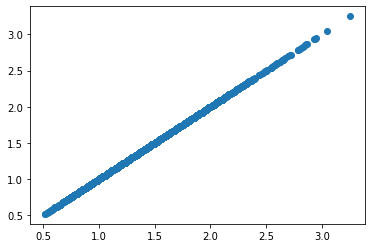

In [47]:
plt.scatter(y_test,pred_test)
plt.xlable = ('Actual Price of Avocado')
plt.ylable = ('Predicated Price of Avocado')
plt.title = ('Actual Price v/s Predicated Price')
plt.show()

from above scatterplot I could clerly see that the actual and predicated are alomost same.

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
rt =  RandomForestRegressor()
rt.fit(x_train,y_train)
predrt = rt.predict(x_test)
print('accuracy',r2_score(y_test,predrt))

accuracy 0.9999615653179588


In [50]:
mae = mean_absolute_error(y_test,predrt)
mse = mean_squared_error(y_test,predrt)
rmse = np.sqrt(mse)
print('Mean Squared Erro=',mse,'Root Mean Squared Error=',rmse)

Mean Squared Erro= 6.129008219178014e-06 Root Mean Squared Error= 0.0024756833842755448


In [51]:
from sklearn.svm import SVR

In [52]:
svr =  SVR()
svr.fit(x_train,y_train)
predrt = svr.predict(x_test)
print('accuracy',r2_score(y_test,predrt))

accuracy 0.970524841339326


In [53]:
mae = mean_absolute_error(y_test,predrt)
mse = mean_squared_error(y_test,predrt)
rmse = np.sqrt(mse)
print('Mean Squared Erro=',mse,'Root Mean Squared Error=',rmse)

Mean Squared Erro= 0.0047002727770479045 Root Mean Squared Error= 0.06855853540623447


In [54]:
from sklearn.ensemble import AdaBoostRegressor

In [55]:
ad = AdaBoostRegressor()
ad.fit(x_train,y_train)
predrt = ad.predict(x_test)
print('accuracy',r2_score(y_test,predrt))

accuracy 0.993528013390673


In [56]:
mae = mean_absolute_error(y_test,predrt)
mse = mean_squared_error(y_test,predrt)
rmse = np.sqrt(mse)
print('Mean Squared Erro=',mse,'Root Mean Squared Error=',rmse)

Mean Squared Erro= 0.0010320589898579662 Root Mean Squared Error= 0.03212567493233358


In [57]:
from sklearn.ensemble import BaggingRegressor

In [58]:
bg = BaggingRegressor()
bg.fit(x_train,y_train)
predrt = bg.predict(x_test)
print('accuracy',r2_score(y_test,predrt))

accuracy 0.9999674890085564


In [59]:
mae = mean_absolute_error(y_test,predrt)
mse = mean_squared_error(y_test,predrt)
rmse = np.sqrt(mse)
print('Mean Squared Erro=',mse,'Root Mean Squared Error=',rmse)

Mean Squared Erro= 5.1843835616438186e-06 Root Mean Squared Error= 0.002276924144903343


from above model accuracy scores is high and error scores are for linearRegression. so LinearRegrssion would be best fit forthe above the problem statement.

In [65]:
import pickle
file = open('Avacoda.pkl', 'wb')
pickle.dump(lr, file)
model=open('Avacoda.pkl', 'rb')
Avacoda=pickle.load(model)